In [1]:
#pip install quandl

In [2]:
#import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import os

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
#df = quandl.get('NSE/TATAGLOBAL')
df = web.DataReader('TATAGLOBAL.BO', data_source='yahoo', start='2012-01-01', end='2020-07-13')
df.head

<bound method NDFrame.head of                   High         Low  ...    Volume   Adj Close
Date                                ...                      
2012-01-02   91.750000   89.250000  ...  101612.0   79.227859
2012-01-03   94.849998   91.500000  ...  217321.0   82.409180
2012-01-04   96.750000   94.150002  ...  293955.0   82.932114
2012-01-05   95.199997   92.050003  ...  146324.0   80.927452
2012-01-06   94.500000   91.349998  ...  109755.0   81.711899
...                ...         ...  ...       ...         ...
2020-07-08  436.000000  414.899994  ...  355377.0  432.299988
2020-07-09  437.149994  429.350006  ...  171590.0  433.649994
2020-07-10  437.750000  428.450012  ...  156659.0  430.250000
2020-07-13  433.399994  422.049988  ...  227488.0  424.399994
2020-07-14  426.450012  417.399994  ...  124379.0  419.000000

[2097 rows x 6 columns]>

In [4]:
df.shape

(2097, 6)

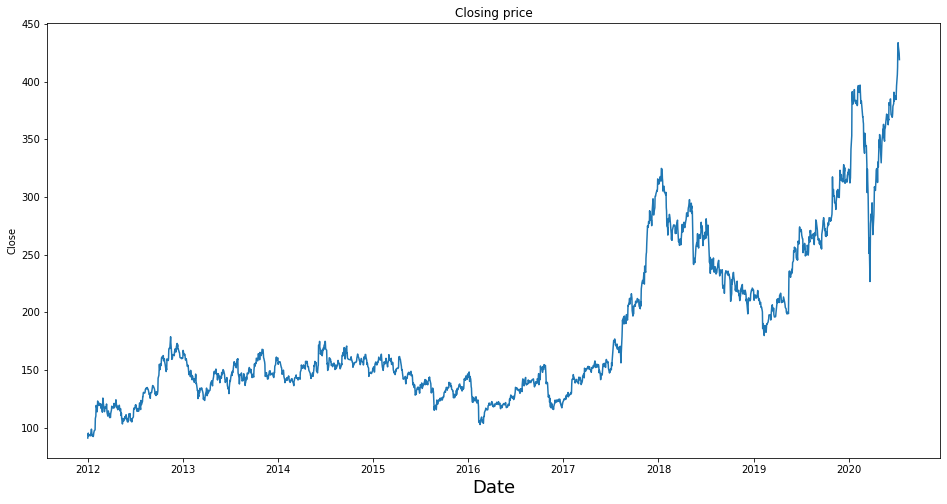

In [5]:
#visualization of closing price
plt.figure(figsize=(16,8))
plt.title('Closing price')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close')
plt.show()

In [6]:
#create new dataframe with only the "close"
data = df[["Close"]]
#convert the dataframe to numpy array
dataset= data.values
#get the number of rows to train the model on 
training_data_len = math.ceil (len(dataset) * .8 )
training_data_len

1678

In [7]:
#scalling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.01064917],
       [0.01239971],
       ...,
       [0.99008025],
       [0.9730124 ],
       [0.95725749]])

In [8]:
#creating the training dataset 
#creating the scaled training dataset
train_data = scaled_data[0:training_data_len, : ]
#split the data into x_train and y_train datasets
X_train = []
y_train= []
for i in range(60,len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(X_train)
    print(y_train)
    print()
 



[array([0.        , 0.01064917, 0.01239971, 0.00568927, 0.00831509,
       0.00641866, 0.00831509, 0.00583516, 0.0055434 , 0.00919038,
       0.02246535, 0.01750547, 0.00612691, 0.00875274, 0.00510576,
       0.00379284, 0.00714806, 0.01298322, 0.01867251, 0.02056891,
       0.04916119, 0.05324581, 0.05587163, 0.08242159, 0.07381472,
       0.06637491, 0.07892048, 0.09365426, 0.08212984, 0.08898614,
       0.08665207, 0.08694383, 0.0872356 , 0.08242159, 0.08650621,
       0.07527351, 0.08431802, 0.08329685, 0.06535376, 0.08563092,
       0.1010941 , 0.09409191, 0.08592268, 0.07352297, 0.06666666,
       0.07162654, 0.07862873, 0.07585704, 0.07906637, 0.08606857,
       0.07279357, 0.06433259, 0.05543399, 0.06374909, 0.06856309,
       0.05849744, 0.0628738 , 0.05164113, 0.0552881 , 0.0560175 ])]
[0.051932883496950355]

[array([0.        , 0.01064917, 0.01239971, 0.00568927, 0.00831509,
       0.00641866, 0.00831509, 0.00583516, 0.0055434 , 0.00919038,
       0.02246535, 0.01750547, 0.0

In [9]:
#convert the X_train and y_train to numpy arrays
X_train,y_train =np.array(X_train), np.array(y_train)

In [10]:
#reshape the data
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape


(1618, 60, 1)

In [11]:
#build LSTM
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM (50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM (50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)               

In [13]:
#compail the model
model.compile(optimizer='adam', loss="MSE")

In [14]:
model.fit(X_train,y_train, batch_size=32, epochs=100)

Epoch 1/100
1618/1618 [==============================] - 26s 16ms/step - loss: 0.0053
Epoch 2/100
1618/1618 [==============================] - 23s 14ms/step - loss: 0.0014
Epoch 3/100
1618/1618 [==============================] - 23s 14ms/step - loss: 0.0014
Epoch 4/100
1618/1618 [==============================] - 23s 14ms/step - loss: 0.0015
Epoch 5/100
1618/1618 [==============================] - 23s 14ms/step - loss: 0.0011
Epoch 6/100
1618/1618 [==============================] - 22s 14ms/step - loss: 9.1181e-04
Epoch 7/100
1618/1618 [==============================] - 23s 14ms/step - loss: 9.2373e-04
Epoch 8/100
1618/1618 [==============================] - 23s 14ms/step - loss: 8.0188e-04
Epoch 9/100
1618/1618 [==============================] - 23s 14ms/step - loss: 7.9518e-04
Epoch 10/100
1618/1618 [==============================] - 23s 14ms/step - loss: 8.2822e-04
Epoch 11/100
1618/1618 [==============================] - 22s 14ms/step - loss: 7.5403e-04
Epoch 12/100
1618/1618 [====

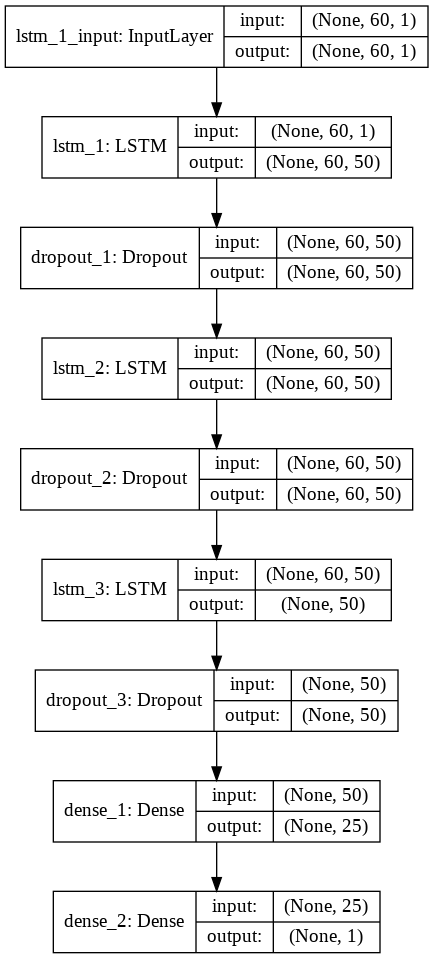

In [15]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [16]:
#create the testing set
#creating a new array containing scaled values from index 16-- 20--
test_data = scaled_data[training_data_len - 60 : , :]
#create the dataset X_test and y_test
X_test = []
y_test= dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])
  


In [17]:
#convert the dat
X_test= np.array(X_test)

In [18]:
#reshape the data
X_test = np.reshape (X_test, (X_test.shape[0],X_test.shape[1],1))
X_test

array([[[0.42713349],
        [0.43311454],
        [0.442159  ],
        ...,
        [0.3868709 ],
        [0.37345002],
        [0.37695115]],

       [[0.43311454],
        [0.442159  ],
        [0.44142961],
        ...,
        [0.37345002],
        [0.37695115],
        [0.38336982]],

       [[0.442159  ],
        [0.44142961],
        [0.455434  ],
        ...,
        [0.37695115],
        [0.38336982],
        [0.37082422]],

       ...,

       [[0.65572574],
        [0.6773158 ],
        [0.68096278],
        ...,
        [0.93858501],
        [0.99606125],
        [1.        ]],

       [[0.6773158 ],
        [0.68096278],
        [0.68198395],
        ...,
        [0.99606125],
        [1.        ],
        [0.99008025]],

       [[0.68096278],
        [0.68198395],
        [0.64638954],
        ...,
        [1.        ],
        [0.99008025],
        [0.9730124 ]]])

In [19]:
#get the models predicted values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions



array([[220.22208],
       [222.02008],
       [220.76192],
       [220.24142],
       [224.39514],
       [222.02153],
       [219.00941],
       [217.79099],
       [218.7017 ],
       [216.88757],
       [216.07188],
       [212.95753],
       [213.56987],
       [217.93217],
       [219.2547 ],
       [220.74443],
       [221.73608],
       [223.11842],
       [219.30765],
       [218.27785],
       [216.99005],
       [217.45062],
       [218.06247],
       [217.01564],
       [218.17195],
       [219.20267],
       [217.45905],
       [212.76642],
       [211.366  ],
       [209.79202],
       [208.14587],
       [203.02469],
       [202.3561 ],
       [208.75687],
       [212.72525],
       [213.3939 ],
       [211.724  ],
       [210.19711],
       [210.27492],
       [210.82805],
       [213.86818],
       [217.70332],
       [218.98611],
       [220.04787],
       [220.31136],
       [219.63518],
       [219.077  ],
       [216.5712 ],
       [212.66557],
       [212.9847 ],


In [20]:
#Model Evaluation RMSE - Root Mean Square Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.023099621611165

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


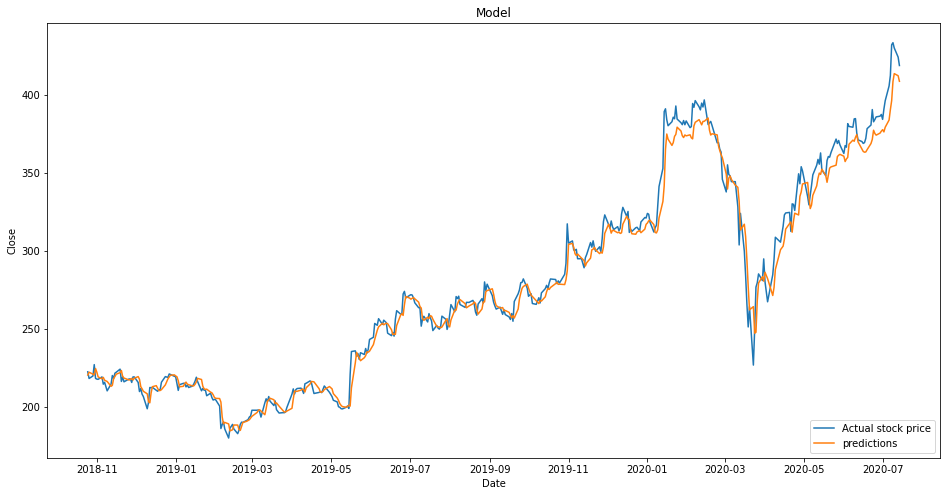

In [21]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visualization
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
# plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Actual stock price','predictions'], loc='lower right')
plt.show()

In [22]:
#show the valid and prediction
valid.tail(10)

,Close,predictions
Date,,
2020-07-01,384.399994,377.777344
2020-07-02,391.049988,376.346497
2020-07-03,396.350006,379.332642
2020-07-06,405.850006,383.978088
2020-07-07,412.600006,390.648804
2020-07-08,432.299988,396.441925
2020-07-09,433.649994,408.686340
2020-07-10,430.250000,413.779785
2020-07-13,424.399994,412.426544


In [23]:
#get the quote
tata = web.DataReader('TATAGLOBAL.BO', data_source='yahoo', start='2012-01-01', end='2020-06-13')
#create new dataframe
new_df = tata.filter(['Close'])
# print(new_df.tail())
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaling the data to values between 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data to np array
X_test = np.array(X_test)
#reshape the data
X_test= np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#get the predict value
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price) 

[[365.32263]]


In [24]:
tata1 = web.DataReader('TATAGLOBAL.BO', data_source='yahoo', start='2020-07-01', end='2020-07-14')
tata1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-01,388.450012,381.049988,387.500000,384.399994,94137,384.399994
2020-07-02,395.000000,384.950012,387.799988,391.049988,86168,391.049988
2020-07-03,402.200012,392.950012,395.000000,396.350006,202767,396.350006
2020-07-06,408.299988,397.000000,397.000000,405.850006,138408,405.850006
2020-07-07,414.200012,403.600006,409.700012,412.600006,195011,412.600006
2020-07-08,436.000000,414.899994,415.000000,432.299988,355377,432.299988
2020-07-09,437.149994,429.350006,432.500000,433.649994,171590,433.649994
2020-07-10,437.750000,428.450012,430.100006,430.250000,156659,430.250000
2020-07-13,433.399994,422.049988,430.250000,424.399994,227488,424.399994
